In [1]:
import torch
import pandas as pd
import numpy as np
from models.model import BasicMF
from train.TrainAndEvaluate import CrossValidation, Train, computing_r_hat_using_ERM, Test, ColdStartTest
from utils.utils import seed_everything
from utils.data import generate_click_data, get_train_data, get_data_for_cold_start_testing, get_cold_start_users
from sklearn.model_selection import train_test_split

In [1]:
import matplotlib.pyplot as plt

TypeError: float() argument must be a string or a number, not 'dict'

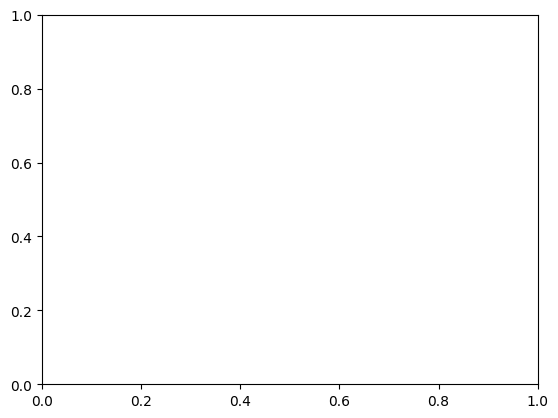

In [2]:
plt.plot({1:2}.items)

In [2]:
seed_everything(42)
num_users = 943
num_items = 1682
data = torch.tensor(pd.read_csv("data/semi-data").iloc[:, 1:].values)
data

tensor([[0.0000e+00, 0.0000e+00, 7.5689e-01, 5.3379e-01],
        [0.0000e+00, 1.0000e+00, 3.6157e-01, 5.6538e-01],
        [0.0000e+00, 2.0000e+00, 7.5689e-01, 3.5982e-01],
        ...,
        [9.4200e+02, 1.6790e+03, 5.9671e-02, 1.2541e-02],
        [9.4200e+02, 1.6800e+03, 1.1591e-01, 2.7859e-02],
        [9.4200e+02, 1.6810e+03, 1.9183e-01, 1.9211e-02]], dtype=torch.float64)

## p = 0.5 

In [5]:
seed_everything(42)
power = 0
click_data, _, _ = generate_click_data(data, num_users, num_items, power=power)
neg_data = click_data[click_data[:, 6]==0, :]
pos_data = click_data[click_data[:, 6]==1, :]
train, test = train_test_split(neg_data, test_size=0.1, random_state=0)
train = torch.vstack([pos_data, train]) # 使用未被点击的一部分作为测试集

### 0

In [6]:
embedding_dim = 10
lr = 5e-3
alpha = 5e-3
model_type = 0
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, 
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False)

------ repeat : 1 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2411.47it/s]


Epoch 1: train loss :   0.631420   val loss :   0.484171   val score :   0.306469
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2390.67it/s]


Epoch 2: train loss :   0.505165   val loss :   0.480352   val score :   0.313892
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2466.64it/s]


Epoch 3: train loss :   0.502012   val loss :   0.480149   val score :   0.317073
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2383.72it/s]


Epoch 4: train loss :   0.499441   val loss :   0.479913   val score :   0.314952
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2482.45it/s]


Epoch 5: train loss :   0.497655   val loss :   0.479612   val score :   0.313892
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2394.49it/s]


Epoch 6: train loss :   0.495244   val loss :   0.479157   val score :   0.318134
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2478.67it/s]


Epoch 7: train loss :   0.493987   val loss :   0.479060   val score :   0.314952
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2457.30it/s]


Epoch 8: train loss :   0.492173   val loss :   0.478908   val score :   0.316013
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2386.63it/s]


Epoch 9: train loss :   0.490614   val loss :   0.478731   val score :   0.319194
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2525.23it/s]


Epoch 10: train loss :   0.489012   val loss :   0.478619   val score :   0.306469
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 2507.19it/s]


Epoch 11: train loss :   0.487708   val loss :   0.478613   val score :   0.306469
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2524.14it/s]


Epoch 12: train loss :   0.487263   val loss :   0.478766   val score :   0.302227
Epoch 00012: reducing learning rate of group 0 to 5.0000e-04.
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 2560.37it/s]


Epoch 13: train loss :   0.482805   val loss :   0.478633   val score :   0.303287


  0%|          | 0/481 [00:00<?, ?it/s]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

### 1

In [14]:
embedding_dim = 10
lr = 1e-1
alpha = 1e-1
model_type = 1
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, 
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False)

------ repeat : 1 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1107.83it/s]


Epoch 1: train loss :   0.208392   val loss :   0.169258   val score :   0.250265
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2037.43it/s]


Epoch 2: train loss :   0.181390   val loss :   0.169129   val score :   0.238600
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1979.76it/s]


Epoch 3: train loss :   0.181248   val loss :   0.169048   val score :   0.215270
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1948.67it/s]


Epoch 4: train loss :   0.181171   val loss :   0.169096   val score :   0.211029
Epoch 00004: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1790.52it/s]


Epoch 5: train loss :   0.176034   val loss :   0.168405   val score :   0.286320
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1901.09it/s]


Epoch 6: train loss :   0.175363   val loss :   0.168358   val score :   0.281018
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1977.82it/s]


Epoch 7: train loss :   0.175570   val loss :   0.168425   val score :   0.284199
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2155.27it/s]


Epoch 8: train loss :   0.175463   val loss :   0.168392   val score :   0.276776
Epoch 00008: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1993.99it/s]


Epoch 9: train loss :   0.175101   val loss :   0.168370   val score :   0.289502
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1967.49it/s]


Epoch 10: train loss :   0.175312   val loss :   0.168360   val score :   0.287381
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 2086.40it/s]


Epoch 11: train loss :   0.175499   val loss :   0.168362   val score :   0.288441
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1915.73it/s]


Epoch 12: train loss :   0.175139   val loss :   0.168351   val score :   0.289502
Epoch 00012: reducing learning rate of group 0 to 1.0000e-04.
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1114.84it/s]


Epoch 13: train loss :   0.174842   val loss :   0.168351   val score :   0.290562
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1978.93it/s]


Epoch 14: train loss :   0.175075   val loss :   0.168351   val score :   0.290562
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1946.27it/s]


Epoch 15: train loss :   0.174955   val loss :   0.168352   val score :   0.287381
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1768.07it/s]


Epoch 16: train loss :   0.175342   val loss :   0.168352   val score :   0.288441
Epoch 00016: reducing learning rate of group 0 to 1.0000e-05.
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 1138.41it/s]


Epoch 17: train loss :   0.175242   val loss :   0.168352   val score :   0.288441


100%|██████████| 4/4 [00:00<00:00, 97.78it/s]


------ repeat : 2 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2001.15it/s]


Epoch 1: train loss :   0.207243   val loss :   0.169173   val score :   0.233298
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2120.90it/s]


Epoch 2: train loss :   0.181318   val loss :   0.169269   val score :   0.232238
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2222.73it/s]


Epoch 3: train loss :   0.181882   val loss :   0.169137   val score :   0.239661
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2274.82it/s]


Epoch 4: train loss :   0.181774   val loss :   0.169018   val score :   0.254507
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2018.84it/s]


Epoch 5: train loss :   0.182072   val loss :   0.169587   val score :   0.257688
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1435.12it/s]


Epoch 6: train loss :   0.181731   val loss :   0.169449   val score :   0.204666
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1132.52it/s]


Epoch 7: train loss :   0.182492   val loss :   0.169042   val score :   0.249205
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2031.23it/s]


Epoch 8: train loss :   0.182801   val loss :   0.169355   val score :   0.220573
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1554.88it/s]


Epoch 9: train loss :   0.176472   val loss :   0.168436   val score :   0.282078
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1797.48it/s]


Epoch 10: train loss :   0.176255   val loss :   0.168389   val score :   0.291622
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 2110.46it/s]


Epoch 11: train loss :   0.175491   val loss :   0.168391   val score :   0.291622
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2020.40it/s]


Epoch 12: train loss :   0.176029   val loss :   0.168336   val score :   0.292683
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1813.08it/s]


Epoch 13: train loss :   0.176017   val loss :   0.168411   val score :   0.294804
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1966.51it/s]


Epoch 14: train loss :   0.175826   val loss :   0.168363   val score :   0.286320
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1954.26it/s]


Epoch 15: train loss :   0.175613   val loss :   0.168389   val score :   0.290562
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1878.16it/s]


Epoch 16: train loss :   0.176180   val loss :   0.168353   val score :   0.289502
Epoch 00016: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 2227.91it/s]


Epoch 17: train loss :   0.175010   val loss :   0.168366   val score :   0.293743


100%|██████████| 4/4 [00:00<00:00, 166.19it/s]


------ repeat : 3 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2143.51it/s]


Epoch 1: train loss :   0.207145   val loss :   0.169257   val score :   0.223754
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2202.53it/s]


Epoch 2: train loss :   0.181506   val loss :   0.169181   val score :   0.240721
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2145.77it/s]


Epoch 3: train loss :   0.181267   val loss :   0.169167   val score :   0.229056
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1146.50it/s]


Epoch 4: train loss :   0.181739   val loss :   0.169203   val score :   0.230117
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1261.11it/s]


Epoch 5: train loss :   0.182518   val loss :   0.169434   val score :   0.242842
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2065.07it/s]


Epoch 6: train loss :   0.181869   val loss :   0.169122   val score :   0.204666
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1869.64it/s]


Epoch 7: train loss :   0.181730   val loss :   0.169525   val score :   0.232238
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2108.37it/s]


Epoch 8: train loss :   0.181881   val loss :   0.169285   val score :   0.219512
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1256.11it/s]


Epoch 9: train loss :   0.176603   val loss :   0.168463   val score :   0.264051
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1506.55it/s]


Epoch 10: train loss :   0.175940   val loss :   0.168393   val score :   0.282078
------ epoch:11 ------


100%|██████████| 943/943 [00:01<00:00, 898.11it/s]


Epoch 11: train loss :   0.175591   val loss :   0.168413   val score :   0.260870
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1073.02it/s]


Epoch 12: train loss :   0.175922   val loss :   0.168442   val score :   0.267232
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1257.04it/s]


Epoch 13: train loss :   0.175706   val loss :   0.168355   val score :   0.260870
Epoch 00013: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1494.68it/s]


Epoch 14: train loss :   0.175553   val loss :   0.168337   val score :   0.260870


100%|██████████| 4/4 [00:00<00:00, 90.55it/s]


------ repeat : 4 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1030.67it/s]


Epoch 1: train loss :   0.208338   val loss :   0.168774   val score :   0.251326
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2245.65it/s]


Epoch 2: train loss :   0.181288   val loss :   0.169537   val score :   0.234358
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1983.08it/s]


Epoch 3: train loss :   0.181497   val loss :   0.168991   val score :   0.253446
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1925.00it/s]


Epoch 4: train loss :   0.181748   val loss :   0.169441   val score :   0.240721
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1946.66it/s]


Epoch 5: train loss :   0.182210   val loss :   0.169413   val score :   0.234358
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1540.48it/s]


Epoch 6: train loss :   0.181583   val loss :   0.169247   val score :   0.233298
Epoch 00006: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1082.91it/s]


Epoch 7: train loss :   0.176428   val loss :   0.168429   val score :   0.308590
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2441.70it/s]


Epoch 8: train loss :   0.175892   val loss :   0.168363   val score :   0.302227
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2197.21it/s]


Epoch 9: train loss :   0.175487   val loss :   0.168328   val score :   0.312831
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2050.72it/s]


Epoch 10: train loss :   0.175919   val loss :   0.168447   val score :   0.305408
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1814.65it/s]


Epoch 11: train loss :   0.175903   val loss :   0.168388   val score :   0.301166
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1815.32it/s]


Epoch 12: train loss :   0.175735   val loss :   0.168415   val score :   0.304348
Epoch 00012: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1604.78it/s]


Epoch 13: train loss :   0.175244   val loss :   0.168378   val score :   0.310710


100%|██████████| 4/4 [00:00<00:00, 144.70it/s]


------ repeat : 5 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2199.29it/s]


Epoch 1: train loss :   0.207008   val loss :   0.169043   val score :   0.260870
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1519.30it/s]


Epoch 2: train loss :   0.181313   val loss :   0.169488   val score :   0.243902
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1253.35it/s]


Epoch 3: train loss :   0.181299   val loss :   0.168869   val score :   0.275716
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1512.45it/s]


Epoch 4: train loss :   0.181788   val loss :   0.168857   val score :   0.253446
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2348.76it/s]


Epoch 5: train loss :   0.181836   val loss :   0.169332   val score :   0.229056
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1655.94it/s]


Epoch 6: train loss :   0.181941   val loss :   0.169179   val score :   0.238600
Epoch 00006: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1102.93it/s]


Epoch 7: train loss :   0.175943   val loss :   0.168441   val score :   0.299046
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1912.15it/s]


Epoch 8: train loss :   0.175469   val loss :   0.168419   val score :   0.303287
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1496.15it/s]


Epoch 9: train loss :   0.175372   val loss :   0.168396   val score :   0.302227
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2078.44it/s]


Epoch 10: train loss :   0.175478   val loss :   0.168466   val score :   0.310710
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1437.12it/s]


Epoch 11: train loss :   0.175707   val loss :   0.168361   val score :   0.304348
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1818.53it/s]


Epoch 12: train loss :   0.175492   val loss :   0.168395   val score :   0.299046
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1193.58it/s]


Epoch 13: train loss :   0.175615   val loss :   0.168548   val score :   0.293743
Epoch 00013: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 2252.91it/s]


Epoch 14: train loss :   0.175425   val loss :   0.168448   val score :   0.296925


100%|██████████| 4/4 [00:00<00:00, 176.60it/s]


### 2

In [15]:
embedding_dim = 10
lr = 1e-1
alpha = 1e-1
model_type = 2
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, 
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False)

------ repeat : 1 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1551.06it/s]


Epoch 1: train loss :   0.714220   val loss :   0.545118   val score :   0.261930
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2063.05it/s]


Epoch 2: train loss :   0.684513   val loss :   0.544554   val score :   0.254507
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1145.92it/s]


Epoch 3: train loss :   0.702578   val loss :   0.543955   val score :   0.235419
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2026.54it/s]


Epoch 4: train loss :   0.689552   val loss :   0.543059   val score :   0.255567
Epoch 00004: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1722.85it/s]


Epoch 5: train loss :   0.589908   val loss :   0.526220   val score :   0.300106
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2087.23it/s]


Epoch 6: train loss :   0.558763   val loss :   0.525165   val score :   0.299046
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2042.36it/s]


Epoch 7: train loss :   0.557003   val loss :   0.525060   val score :   0.295864
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1739.92it/s]


Epoch 8: train loss :   0.556514   val loss :   0.524731   val score :   0.293743
Epoch 00008: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1918.81it/s]


Epoch 9: train loss :   0.550789   val loss :   0.524881   val score :   0.295864


100%|██████████| 4/4 [00:00<00:00, 171.35it/s]


------ repeat : 2 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1521.92it/s]


Epoch 1: train loss :   0.713084   val loss :   0.544182   val score :   0.246023
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1152.42it/s]


Epoch 2: train loss :   0.693045   val loss :   0.547247   val score :   0.250265
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1453.07it/s]


Epoch 3: train loss :   0.699139   val loss :   0.546228   val score :   0.236479
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 952.61it/s] 


Epoch 4: train loss :   0.690605   val loss :   0.545727   val score :   0.253446
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1779.20it/s]


Epoch 5: train loss :   0.695053   val loss :   0.544914   val score :   0.255567
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2160.74it/s]


Epoch 6: train loss :   0.700448   val loss :   0.547010   val score :   0.253446
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2144.88it/s]


Epoch 7: train loss :   0.696799   val loss :   0.543568   val score :   0.239661
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2174.13it/s]


Epoch 8: train loss :   0.696495   val loss :   0.542823   val score :   0.222694
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2342.67it/s]


Epoch 9: train loss :   0.588825   val loss :   0.526739   val score :   0.282078
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1201.29it/s]


Epoch 10: train loss :   0.559027   val loss :   0.525285   val score :   0.302227
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1872.60it/s]


Epoch 11: train loss :   0.558074   val loss :   0.524851   val score :   0.305408
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1799.61it/s]


Epoch 12: train loss :   0.557007   val loss :   0.524340   val score :   0.300106
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1712.06it/s]


Epoch 13: train loss :   0.557210   val loss :   0.524839   val score :   0.300106
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1937.51it/s]


Epoch 14: train loss :   0.556453   val loss :   0.525001   val score :   0.297985
Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1914.66it/s]


Epoch 15: train loss :   0.552183   val loss :   0.525021   val score :   0.299046


100%|██████████| 4/4 [00:00<00:00, 166.58it/s]


------ repeat : 3 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1883.95it/s]


Epoch 1: train loss :   0.714634   val loss :   0.543383   val score :   0.254507
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1131.03it/s]


Epoch 2: train loss :   0.686188   val loss :   0.546977   val score :   0.287381
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1140.58it/s]


Epoch 3: train loss :   0.698800   val loss :   0.547231   val score :   0.268293
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1903.58it/s]


Epoch 4: train loss :   0.698394   val loss :   0.541794   val score :   0.276776
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1922.00it/s]


Epoch 5: train loss :   0.696444   val loss :   0.545248   val score :   0.287381
Epoch 00005: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2095.32it/s]


Epoch 6: train loss :   0.591086   val loss :   0.525965   val score :   0.338282
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1972.23it/s]


Epoch 7: train loss :   0.558664   val loss :   0.525204   val score :   0.345705
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2083.03it/s]


Epoch 8: train loss :   0.559547   val loss :   0.525311   val score :   0.343584
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1438.14it/s]


Epoch 9: train loss :   0.557429   val loss :   0.525136   val score :   0.339343
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1515.67it/s]


Epoch 10: train loss :   0.556995   val loss :   0.525365   val score :   0.346766
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1517.85it/s]


Epoch 11: train loss :   0.556726   val loss :   0.525193   val score :   0.336161
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1324.32it/s]


Epoch 12: train loss :   0.556948   val loss :   0.525178   val score :   0.338282
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1376.78it/s]


Epoch 13: train loss :   0.556657   val loss :   0.524996   val score :   0.336161
Epoch 00013: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1221.25it/s]


Epoch 14: train loss :   0.551353   val loss :   0.524986   val score :   0.332980


100%|██████████| 4/4 [00:00<00:00, 220.49it/s]


------ repeat : 4 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1604.28it/s]


Epoch 1: train loss :   0.713301   val loss :   0.547524   val score :   0.247084
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1817.69it/s]


Epoch 2: train loss :   0.690915   val loss :   0.542524   val score :   0.262990
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1276.65it/s]


Epoch 3: train loss :   0.691656   val loss :   0.545271   val score :   0.254507
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1435.21it/s]


Epoch 4: train loss :   0.697180   val loss :   0.545044   val score :   0.250265
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1895.65it/s]


Epoch 5: train loss :   0.698782   val loss :   0.543392   val score :   0.270414
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1789.48it/s]


Epoch 6: train loss :   0.687232   val loss :   0.545643   val score :   0.234358
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2141.35it/s]


Epoch 7: train loss :   0.687024   val loss :   0.547414   val score :   0.232238
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2029.03it/s]


Epoch 8: train loss :   0.720614   val loss :   0.545643   val score :   0.242842
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2038.99it/s]


Epoch 9: train loss :   0.594872   val loss :   0.527315   val score :   0.288441
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1668.25it/s]


Epoch 10: train loss :   0.559143   val loss :   0.525939   val score :   0.297985
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1119.43it/s]


Epoch 11: train loss :   0.557973   val loss :   0.525170   val score :   0.305408
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1143.46it/s]


Epoch 12: train loss :   0.556684   val loss :   0.525017   val score :   0.310710
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1377.23it/s]


Epoch 13: train loss :   0.557051   val loss :   0.524967   val score :   0.305408
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1413.36it/s]


Epoch 14: train loss :   0.556890   val loss :   0.525143   val score :   0.309650
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1132.12it/s]


Epoch 15: train loss :   0.557034   val loss :   0.525149   val score :   0.304348
Epoch 00015: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:16 ------


100%|██████████| 943/943 [00:01<00:00, 848.27it/s]


Epoch 16: train loss :   0.551255   val loss :   0.525044   val score :   0.304348


100%|██████████| 4/4 [00:00<00:00, 77.80it/s]


------ repeat : 5 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1316.44it/s]


Epoch 1: train loss :   0.714279   val loss :   0.543331   val score :   0.258749
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1972.28it/s]


Epoch 2: train loss :   0.690367   val loss :   0.544342   val score :   0.276776
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1963.21it/s]


Epoch 3: train loss :   0.694622   val loss :   0.545465   val score :   0.271474
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1973.78it/s]


Epoch 4: train loss :   0.690154   val loss :   0.545181   val score :   0.258749
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1972.16it/s]


Epoch 5: train loss :   0.709707   val loss :   0.542809   val score :   0.264051
Epoch 00005: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1935.10it/s]


Epoch 6: train loss :   0.588831   val loss :   0.527176   val score :   0.321315
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1188.38it/s]


Epoch 7: train loss :   0.559399   val loss :   0.525837   val score :   0.339343
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1856.66it/s]


Epoch 8: train loss :   0.557357   val loss :   0.525130   val score :   0.334040
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1985.82it/s]


Epoch 9: train loss :   0.557045   val loss :   0.524914   val score :   0.337222
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1972.53it/s]


Epoch 10: train loss :   0.556784   val loss :   0.525787   val score :   0.341463
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1918.78it/s]


Epoch 11: train loss :   0.556978   val loss :   0.525670   val score :   0.342524
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1956.57it/s]


Epoch 12: train loss :   0.556476   val loss :   0.525084   val score :   0.337222
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1622.92it/s]


Epoch 13: train loss :   0.557367   val loss :   0.524500   val score :   0.338282
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1304.29it/s]


Epoch 14: train loss :   0.556631   val loss :   0.525017   val score :   0.332980
Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1571.32it/s]


Epoch 15: train loss :   0.550845   val loss :   0.524954   val score :   0.332980


100%|██████████| 4/4 [00:00<00:00, 98.84it/s]


### 3

In [16]:
embedding_dim = 10
lr = 1e-1
alpha = 1e-1
theta_clip = 0.05
model_type = 3
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, theta_clip=theta_clip, 
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False)

------ repeat : 1 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1976.33it/s]


Epoch 1: train loss :   0.714220   val loss :   0.545118   val score :   0.261930
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1830.93it/s]


Epoch 2: train loss :   0.684513   val loss :   0.544554   val score :   0.254507
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1121.92it/s]


Epoch 3: train loss :   0.702578   val loss :   0.543955   val score :   0.235419
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1180.80it/s]


Epoch 4: train loss :   0.689552   val loss :   0.543059   val score :   0.255567
Epoch 00004: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1509.71it/s]


Epoch 5: train loss :   0.589908   val loss :   0.526220   val score :   0.300106
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1158.47it/s]


Epoch 6: train loss :   0.558763   val loss :   0.525165   val score :   0.299046
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1670.33it/s]


Epoch 7: train loss :   0.557003   val loss :   0.525060   val score :   0.295864
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1307.44it/s]


Epoch 8: train loss :   0.556514   val loss :   0.524731   val score :   0.293743
Epoch 00008: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1419.98it/s]


Epoch 9: train loss :   0.550789   val loss :   0.524881   val score :   0.295864


100%|██████████| 4/4 [00:00<00:00, 203.44it/s]


------ repeat : 2 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1413.41it/s]


Epoch 1: train loss :   0.713084   val loss :   0.544182   val score :   0.246023
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1069.64it/s]


Epoch 2: train loss :   0.693045   val loss :   0.547247   val score :   0.250265
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1929.17it/s]


Epoch 3: train loss :   0.699139   val loss :   0.546228   val score :   0.236479
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1361.62it/s]


Epoch 4: train loss :   0.690605   val loss :   0.545727   val score :   0.253446
------ epoch:5 ------


100%|██████████| 943/943 [00:01<00:00, 788.79it/s] 


Epoch 5: train loss :   0.695053   val loss :   0.544914   val score :   0.255567
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2054.09it/s]


Epoch 6: train loss :   0.700448   val loss :   0.547010   val score :   0.253446
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1510.33it/s]


Epoch 7: train loss :   0.696799   val loss :   0.543568   val score :   0.239661
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1619.49it/s]


Epoch 8: train loss :   0.696495   val loss :   0.542823   val score :   0.222694
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:01<00:00, 919.25it/s] 


Epoch 9: train loss :   0.588825   val loss :   0.526739   val score :   0.282078
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1801.43it/s]


Epoch 10: train loss :   0.559027   val loss :   0.525285   val score :   0.302227
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1972.80it/s]


Epoch 11: train loss :   0.558074   val loss :   0.524851   val score :   0.305408
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2072.56it/s]


Epoch 12: train loss :   0.557007   val loss :   0.524340   val score :   0.300106
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 2004.46it/s]


Epoch 13: train loss :   0.557210   val loss :   0.524839   val score :   0.300106
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1704.22it/s]


Epoch 14: train loss :   0.556453   val loss :   0.525001   val score :   0.297985
Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1181.35it/s]


Epoch 15: train loss :   0.552183   val loss :   0.525021   val score :   0.299046


100%|██████████| 4/4 [00:00<00:00, 97.46it/s]


------ repeat : 3 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1647.52it/s]


Epoch 1: train loss :   0.714634   val loss :   0.543383   val score :   0.254507
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1362.38it/s]


Epoch 2: train loss :   0.686188   val loss :   0.546977   val score :   0.287381
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1276.70it/s]


Epoch 3: train loss :   0.698800   val loss :   0.547231   val score :   0.268293
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1266.93it/s]


Epoch 4: train loss :   0.698394   val loss :   0.541794   val score :   0.276776
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1158.86it/s]


Epoch 5: train loss :   0.696444   val loss :   0.545248   val score :   0.287381
Epoch 00005: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1212.94it/s]


Epoch 6: train loss :   0.591086   val loss :   0.525965   val score :   0.338282
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1932.54it/s]


Epoch 7: train loss :   0.558664   val loss :   0.525204   val score :   0.345705
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1813.67it/s]


Epoch 8: train loss :   0.559547   val loss :   0.525311   val score :   0.343584
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1721.33it/s]


Epoch 9: train loss :   0.557429   val loss :   0.525136   val score :   0.339343
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1983.08it/s]


Epoch 10: train loss :   0.556995   val loss :   0.525365   val score :   0.346766
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1468.86it/s]


Epoch 11: train loss :   0.556726   val loss :   0.525193   val score :   0.336161
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2043.43it/s]


Epoch 12: train loss :   0.556948   val loss :   0.525178   val score :   0.338282
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1017.01it/s]


Epoch 13: train loss :   0.556657   val loss :   0.524996   val score :   0.336161
Epoch 00013: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1575.78it/s]


Epoch 14: train loss :   0.551353   val loss :   0.524986   val score :   0.332980


100%|██████████| 4/4 [00:00<00:00, 111.37it/s]


------ repeat : 4 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2226.86it/s]


Epoch 1: train loss :   0.713301   val loss :   0.547524   val score :   0.247084
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1136.44it/s]


Epoch 2: train loss :   0.690915   val loss :   0.542524   val score :   0.262990
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2238.08it/s]


Epoch 3: train loss :   0.691656   val loss :   0.545271   val score :   0.254507
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2060.14it/s]


Epoch 4: train loss :   0.697180   val loss :   0.545044   val score :   0.250265
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2122.79it/s]


Epoch 5: train loss :   0.698782   val loss :   0.543392   val score :   0.270414
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1965.59it/s]


Epoch 6: train loss :   0.687232   val loss :   0.545643   val score :   0.234358
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2182.55it/s]


Epoch 7: train loss :   0.687024   val loss :   0.547414   val score :   0.232238
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2271.74it/s]


Epoch 8: train loss :   0.720614   val loss :   0.545643   val score :   0.242842
Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2206.23it/s]


Epoch 9: train loss :   0.594872   val loss :   0.527315   val score :   0.288441
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1492.54it/s]


Epoch 10: train loss :   0.559143   val loss :   0.525939   val score :   0.297985
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1321.69it/s]


Epoch 11: train loss :   0.557973   val loss :   0.525170   val score :   0.305408
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2356.89it/s]


Epoch 12: train loss :   0.556684   val loss :   0.525017   val score :   0.310710
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1594.97it/s]


Epoch 13: train loss :   0.557051   val loss :   0.524967   val score :   0.305408
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1732.95it/s]


Epoch 14: train loss :   0.556890   val loss :   0.525143   val score :   0.309650
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1531.43it/s]


Epoch 15: train loss :   0.557034   val loss :   0.525149   val score :   0.304348
Epoch 00015: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1581.73it/s]


Epoch 16: train loss :   0.551255   val loss :   0.525044   val score :   0.304348


100%|██████████| 4/4 [00:00<00:00, 106.59it/s]


------ repeat : 5 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1231.39it/s]


Epoch 1: train loss :   0.714279   val loss :   0.543331   val score :   0.258749
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2006.51it/s]


Epoch 2: train loss :   0.690367   val loss :   0.544342   val score :   0.276776
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1199.83it/s]


Epoch 3: train loss :   0.694622   val loss :   0.545465   val score :   0.271474
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1273.79it/s]


Epoch 4: train loss :   0.690154   val loss :   0.545181   val score :   0.258749
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1821.08it/s]


Epoch 5: train loss :   0.709707   val loss :   0.542809   val score :   0.264051
Epoch 00005: reducing learning rate of group 0 to 1.0000e-02.
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1812.88it/s]


Epoch 6: train loss :   0.588831   val loss :   0.527176   val score :   0.321315
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1592.18it/s]


Epoch 7: train loss :   0.559399   val loss :   0.525837   val score :   0.339343
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1896.75it/s]


Epoch 8: train loss :   0.557357   val loss :   0.525130   val score :   0.334040
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1889.49it/s]


Epoch 9: train loss :   0.557045   val loss :   0.524914   val score :   0.337222
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1969.83it/s]


Epoch 10: train loss :   0.556784   val loss :   0.525787   val score :   0.341463
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 2070.50it/s]


Epoch 11: train loss :   0.556978   val loss :   0.525670   val score :   0.342524
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2151.16it/s]


Epoch 12: train loss :   0.556476   val loss :   0.525084   val score :   0.337222
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1118.58it/s]


Epoch 13: train loss :   0.557367   val loss :   0.524500   val score :   0.338282
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1793.00it/s]


Epoch 14: train loss :   0.556631   val loss :   0.525017   val score :   0.332980
Epoch 00014: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1894.02it/s]


Epoch 15: train loss :   0.550845   val loss :   0.524954   val score :   0.332980


100%|██████████| 4/4 [00:00<00:00, 201.45it/s]


### 4

In [17]:
embedding_dim = 10
lr = 1e-3
alpha = 1e-1
phi = 1e-3
lam = 1e-3
sigma2 = None
model_type = 4
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, lam=lam, phi=phi, sigma2=sigma2,
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False)

------ repeat : 1 ------


100%|██████████| 943/943 [00:10<00:00, 89.93it/s]


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 2054.75it/s]


Epoch 1: train loss :   1.028739   val loss :   0.801960   val score :   0.120891
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2010.26it/s]


Epoch 2: train loss :   0.909835   val loss :   0.735789   val score :   0.127253
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1602.19it/s]


Epoch 3: train loss :   0.828898   val loss :   0.694416   val score :   0.134677
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1596.83it/s]


Epoch 4: train loss :   0.772626   val loss :   0.666869   val score :   0.139979
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1364.82it/s]


Epoch 5: train loss :   0.729923   val loss :   0.646074   val score :   0.145281
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1246.24it/s]


Epoch 6: train loss :   0.696751   val loss :   0.629587   val score :   0.155885
------ epoch:7 ------


100%|██████████| 943/943 [00:01<00:00, 891.52it/s]


Epoch 7: train loss :   0.671207   val loss :   0.616456   val score :   0.182397
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1197.72it/s]


Epoch 8: train loss :   0.651092   val loss :   0.605970   val score :   0.190880
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1215.89it/s]


Epoch 9: train loss :   0.635398   val loss :   0.597721   val score :   0.218452
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1355.23it/s]


Epoch 10: train loss :   0.623943   val loss :   0.591182   val score :   0.233298
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1568.02it/s]


Epoch 11: train loss :   0.614820   val loss :   0.586109   val score :   0.240721
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1022.05it/s]


Epoch 12: train loss :   0.607734   val loss :   0.582073   val score :   0.249205
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1902.80it/s]


Epoch 13: train loss :   0.602488   val loss :   0.578923   val score :   0.262990
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1470.66it/s]


Epoch 14: train loss :   0.598718   val loss :   0.576502   val score :   0.269353
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1256.30it/s]


Epoch 15: train loss :   0.595464   val loss :   0.574647   val score :   0.278897
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1846.10it/s]


Epoch 16: train loss :   0.593365   val loss :   0.573151   val score :   0.284199
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 2037.16it/s]


Epoch 17: train loss :   0.591947   val loss :   0.572083   val score :   0.292683
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 1134.19it/s]


Epoch 18: train loss :   0.590846   val loss :   0.571088   val score :   0.291622
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1280.35it/s]


Epoch 19: train loss :   0.589706   val loss :   0.570354   val score :   0.297985
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 1893.93it/s]


Epoch 20: train loss :   0.588933   val loss :   0.569770   val score :   0.292683
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 1539.78it/s]


Epoch 21: train loss :   0.588514   val loss :   0.569376   val score :   0.297985
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 1099.58it/s]


Epoch 22: train loss :   0.587860   val loss :   0.569083   val score :   0.291622
Epoch 00022: reducing learning rate of group 0 to 1.0000e-04.
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 1596.11it/s]


Epoch 23: train loss :   0.587293   val loss :   0.569028   val score :   0.292683


100%|██████████| 4/4 [00:00<00:00, 193.81it/s]


------ repeat : 2 ------


100%|██████████| 943/943 [00:11<00:00, 81.92it/s]


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1932.24it/s]


Epoch 1: train loss :   1.028917   val loss :   0.798266   val score :   0.111347
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2041.15it/s]


Epoch 2: train loss :   0.913414   val loss :   0.736542   val score :   0.116649
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1970.49it/s]


Epoch 3: train loss :   0.834788   val loss :   0.697151   val score :   0.123012
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1930.69it/s]


Epoch 4: train loss :   0.779090   val loss :   0.669954   val score :   0.132556
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1910.04it/s]


Epoch 5: train loss :   0.735556   val loss :   0.649117   val score :   0.144221
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1884.07it/s]


Epoch 6: train loss :   0.703028   val loss :   0.632435   val score :   0.159067
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2199.74it/s]


Epoch 7: train loss :   0.675973   val loss :   0.619044   val score :   0.178155
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1808.60it/s]


Epoch 8: train loss :   0.654570   val loss :   0.608343   val score :   0.193001
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1128.68it/s]


Epoch 9: train loss :   0.638880   val loss :   0.599822   val score :   0.211029
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1452.11it/s]


Epoch 10: train loss :   0.627174   val loss :   0.593038   val score :   0.219512
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1566.29it/s]


Epoch 11: train loss :   0.616791   val loss :   0.587748   val score :   0.231177
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1518.52it/s]


Epoch 12: train loss :   0.609901   val loss :   0.583551   val score :   0.250265
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1874.98it/s]


Epoch 13: train loss :   0.603588   val loss :   0.580229   val score :   0.269353
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1717.37it/s]


Epoch 14: train loss :   0.600039   val loss :   0.577650   val score :   0.282078
------ epoch:15 ------


100%|██████████| 943/943 [00:01<00:00, 930.91it/s] 


Epoch 15: train loss :   0.596820   val loss :   0.575628   val score :   0.288441
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 2009.96it/s]


Epoch 16: train loss :   0.593984   val loss :   0.574122   val score :   0.295864
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 1807.73it/s]


Epoch 17: train loss :   0.592212   val loss :   0.572726   val score :   0.301166
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 1704.80it/s]


Epoch 18: train loss :   0.591349   val loss :   0.571788   val score :   0.306469
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1823.21it/s]


Epoch 19: train loss :   0.589933   val loss :   0.570936   val score :   0.309650
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 1883.59it/s]


Epoch 20: train loss :   0.589021   val loss :   0.570328   val score :   0.312831
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 2017.80it/s]


Epoch 21: train loss :   0.588499   val loss :   0.569824   val score :   0.320255
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 2056.95it/s]


Epoch 22: train loss :   0.588308   val loss :   0.569378   val score :   0.324496
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 2248.29it/s]


Epoch 23: train loss :   0.587552   val loss :   0.569051   val score :   0.325557
------ epoch:24 ------


100%|██████████| 943/943 [00:00<00:00, 1546.26it/s]


Epoch 24: train loss :   0.587550   val loss :   0.568815   val score :   0.328738
------ epoch:25 ------


100%|██████████| 943/943 [00:00<00:00, 1767.34it/s]


Epoch 25: train loss :   0.587493   val loss :   0.568592   val score :   0.329799
------ epoch:26 ------


100%|██████████| 943/943 [00:00<00:00, 1710.82it/s]


Epoch 26: train loss :   0.587204   val loss :   0.568444   val score :   0.330859
------ epoch:27 ------


100%|██████████| 943/943 [00:00<00:00, 1899.51it/s]


Epoch 27: train loss :   0.586822   val loss :   0.568249   val score :   0.332980
------ epoch:28 ------


100%|██████████| 943/943 [00:00<00:00, 2204.22it/s]


Epoch 28: train loss :   0.586816   val loss :   0.568103   val score :   0.332980
------ epoch:29 ------


100%|██████████| 943/943 [00:00<00:00, 2183.29it/s]


Epoch 29: train loss :   0.586762   val loss :   0.568015   val score :   0.329799
------ epoch:30 ------


100%|██████████| 943/943 [00:00<00:00, 2129.57it/s]


Epoch 30: train loss :   0.587063   val loss :   0.567899   val score :   0.328738
Epoch 00030: reducing learning rate of group 0 to 1.0000e-04.


100%|██████████| 4/4 [00:00<00:00, 191.23it/s]


------ repeat : 3 ------


100%|██████████| 943/943 [00:10<00:00, 85.94it/s]


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1485.10it/s]


Epoch 1: train loss :   1.037110   val loss :   0.806978   val score :   0.102863
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1767.23it/s]


Epoch 2: train loss :   0.922041   val loss :   0.744845   val score :   0.107105
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1080.52it/s]


Epoch 3: train loss :   0.842401   val loss :   0.704885   val score :   0.116649
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 980.07it/s] 


Epoch 4: train loss :   0.785399   val loss :   0.676885   val score :   0.129374
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 957.56it/s] 


Epoch 5: train loss :   0.741652   val loss :   0.655107   val score :   0.143160
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2078.17it/s]


Epoch 6: train loss :   0.707859   val loss :   0.637683   val score :   0.154825
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1944.49it/s]


Epoch 7: train loss :   0.680566   val loss :   0.623558   val score :   0.169671
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1090.64it/s]


Epoch 8: train loss :   0.658972   val loss :   0.612154   val score :   0.190880
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1072.93it/s]


Epoch 9: train loss :   0.642422   val loss :   0.603034   val score :   0.202545
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2061.84it/s]


Epoch 10: train loss :   0.629581   val loss :   0.595765   val score :   0.223754
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 2101.93it/s]


Epoch 11: train loss :   0.619041   val loss :   0.589972   val score :   0.235419
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2143.30it/s]


Epoch 12: train loss :   0.611356   val loss :   0.585378   val score :   0.259809
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 2110.05it/s]


Epoch 13: train loss :   0.606039   val loss :   0.581747   val score :   0.276776
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1868.51it/s]


Epoch 14: train loss :   0.601313   val loss :   0.578821   val score :   0.290562
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1996.59it/s]


Epoch 15: train loss :   0.597514   val loss :   0.576568   val score :   0.294804
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1462.62it/s]


Epoch 16: train loss :   0.594985   val loss :   0.574766   val score :   0.300106
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 1089.58it/s]


Epoch 17: train loss :   0.592979   val loss :   0.573357   val score :   0.312831
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 1478.62it/s]


Epoch 18: train loss :   0.591395   val loss :   0.572215   val score :   0.314952
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1736.94it/s]


Epoch 19: train loss :   0.590117   val loss :   0.571333   val score :   0.316013
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 1351.15it/s]


Epoch 20: train loss :   0.589513   val loss :   0.570620   val score :   0.320255
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 1940.36it/s]


Epoch 21: train loss :   0.588896   val loss :   0.570013   val score :   0.321315
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 2138.92it/s]


Epoch 22: train loss :   0.588390   val loss :   0.569619   val score :   0.322375
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 2173.86it/s]


Epoch 23: train loss :   0.588331   val loss :   0.569237   val score :   0.323436
------ epoch:24 ------


100%|██████████| 943/943 [00:00<00:00, 2027.03it/s]


Epoch 24: train loss :   0.587489   val loss :   0.568879   val score :   0.324496
------ epoch:25 ------


100%|██████████| 943/943 [00:00<00:00, 2046.00it/s]


Epoch 25: train loss :   0.587491   val loss :   0.568653   val score :   0.321315
------ epoch:26 ------


100%|██████████| 943/943 [00:00<00:00, 1120.19it/s]


Epoch 26: train loss :   0.587063   val loss :   0.568438   val score :   0.325557
------ epoch:27 ------


100%|██████████| 943/943 [00:00<00:00, 1930.14it/s]


Epoch 27: train loss :   0.587211   val loss :   0.568253   val score :   0.322375
------ epoch:28 ------


100%|██████████| 943/943 [00:00<00:00, 1871.42it/s]


Epoch 28: train loss :   0.587110   val loss :   0.568215   val score :   0.329799
------ epoch:29 ------


100%|██████████| 943/943 [00:00<00:00, 1963.60it/s]


Epoch 29: train loss :   0.587005   val loss :   0.568036   val score :   0.328738
------ epoch:30 ------


100%|██████████| 943/943 [00:00<00:00, 1809.36it/s]


Epoch 30: train loss :   0.586874   val loss :   0.567957   val score :   0.325557


100%|██████████| 4/4 [00:00<00:00, 181.26it/s]


------ repeat : 4 ------


100%|██████████| 943/943 [00:11<00:00, 83.27it/s]


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1879.70it/s]


Epoch 1: train loss :   1.023581   val loss :   0.799266   val score :   0.098621
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2114.54it/s]


Epoch 2: train loss :   0.909107   val loss :   0.736557   val score :   0.111347
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2137.01it/s]


Epoch 3: train loss :   0.831810   val loss :   0.697346   val score :   0.125133
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1961.25it/s]


Epoch 4: train loss :   0.777386   val loss :   0.670534   val score :   0.128314
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1835.56it/s]


Epoch 5: train loss :   0.734928   val loss :   0.649670   val score :   0.143160
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1903.75it/s]


Epoch 6: train loss :   0.701980   val loss :   0.632916   val score :   0.155885
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1922.78it/s]


Epoch 7: train loss :   0.675461   val loss :   0.619394   val score :   0.171792
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1107.63it/s]


Epoch 8: train loss :   0.655053   val loss :   0.608569   val score :   0.187699
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2076.51it/s]


Epoch 9: train loss :   0.639709   val loss :   0.599857   val score :   0.198303
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1786.96it/s]


Epoch 10: train loss :   0.626330   val loss :   0.592996   val score :   0.218452
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1536.66it/s]


Epoch 11: train loss :   0.617018   val loss :   0.587528   val score :   0.237540
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 2000.43it/s]


Epoch 12: train loss :   0.609141   val loss :   0.583206   val score :   0.260870
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1970.00it/s]


Epoch 13: train loss :   0.603606   val loss :   0.579887   val score :   0.273595
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 1965.29it/s]


Epoch 14: train loss :   0.599759   val loss :   0.577235   val score :   0.287381
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 1949.00it/s]


Epoch 15: train loss :   0.596704   val loss :   0.575171   val score :   0.293743
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 1916.42it/s]


Epoch 16: train loss :   0.593965   val loss :   0.573523   val score :   0.304348
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 1896.74it/s]


Epoch 17: train loss :   0.592283   val loss :   0.572248   val score :   0.308590
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 1830.55it/s]


Epoch 18: train loss :   0.590772   val loss :   0.571262   val score :   0.320255
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1964.55it/s]


Epoch 19: train loss :   0.589450   val loss :   0.570451   val score :   0.322375
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 2025.38it/s]


Epoch 20: train loss :   0.589218   val loss :   0.569846   val score :   0.324496
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 1991.36it/s]


Epoch 21: train loss :   0.588136   val loss :   0.569420   val score :   0.326617
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 1953.54it/s]


Epoch 22: train loss :   0.587807   val loss :   0.569029   val score :   0.327678
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 2036.73it/s]


Epoch 23: train loss :   0.587567   val loss :   0.568686   val score :   0.332980
------ epoch:24 ------


100%|██████████| 943/943 [00:00<00:00, 1271.89it/s]


Epoch 24: train loss :   0.587435   val loss :   0.568431   val score :   0.332980
------ epoch:25 ------


100%|██████████| 943/943 [00:00<00:00, 1948.91it/s]


Epoch 25: train loss :   0.586902   val loss :   0.568231   val score :   0.332980
------ epoch:26 ------


100%|██████████| 943/943 [00:00<00:00, 1904.55it/s]


Epoch 26: train loss :   0.587322   val loss :   0.568103   val score :   0.337222
------ epoch:27 ------


100%|██████████| 943/943 [00:00<00:00, 1938.22it/s]


Epoch 27: train loss :   0.586832   val loss :   0.567956   val score :   0.335101
------ epoch:28 ------


100%|██████████| 943/943 [00:00<00:00, 1796.89it/s]


Epoch 28: train loss :   0.587560   val loss :   0.567826   val score :   0.335101
------ epoch:29 ------


100%|██████████| 943/943 [00:00<00:00, 1217.35it/s]


Epoch 29: train loss :   0.587314   val loss :   0.567763   val score :   0.335101
Epoch 00029: reducing learning rate of group 0 to 1.0000e-04.
------ epoch:30 ------


100%|██████████| 943/943 [00:00<00:00, 1257.77it/s]


Epoch 30: train loss :   0.586043   val loss :   0.567758   val score :   0.335101


100%|██████████| 4/4 [00:00<00:00, 232.46it/s]


------ repeat : 5 ------


100%|██████████| 943/943 [00:11<00:00, 85.37it/s]


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1812.56it/s]


Epoch 1: train loss :   1.044350   val loss :   0.810891   val score :   0.096501
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2369.59it/s]


Epoch 2: train loss :   0.924813   val loss :   0.744931   val score :   0.104984
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1849.95it/s]


Epoch 3: train loss :   0.843908   val loss :   0.703275   val score :   0.107105
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1207.69it/s]


Epoch 4: train loss :   0.786005   val loss :   0.675498   val score :   0.111347
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1382.49it/s]


Epoch 5: train loss :   0.741937   val loss :   0.654065   val score :   0.130435
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1946.45it/s]


Epoch 6: train loss :   0.707320   val loss :   0.636794   val score :   0.145281
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1804.57it/s]


Epoch 7: train loss :   0.679931   val loss :   0.622784   val score :   0.155885
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1398.86it/s]


Epoch 8: train loss :   0.658523   val loss :   0.611460   val score :   0.173913
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1912.86it/s]


Epoch 9: train loss :   0.641858   val loss :   0.602387   val score :   0.186638
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2011.13it/s]


Epoch 10: train loss :   0.629222   val loss :   0.595150   val score :   0.207847
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1632.52it/s]


Epoch 11: train loss :   0.618628   val loss :   0.589397   val score :   0.218452
------ epoch:12 ------


100%|██████████| 943/943 [00:01<00:00, 921.32it/s]


Epoch 12: train loss :   0.610613   val loss :   0.584892   val score :   0.235419
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 2222.69it/s]


Epoch 13: train loss :   0.605087   val loss :   0.581288   val score :   0.256628
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 2028.84it/s]


Epoch 14: train loss :   0.600834   val loss :   0.578481   val score :   0.260870
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 2197.14it/s]


Epoch 15: train loss :   0.596920   val loss :   0.576238   val score :   0.281018
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 2149.59it/s]


Epoch 16: train loss :   0.594299   val loss :   0.574476   val score :   0.282078
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 2239.27it/s]


Epoch 17: train loss :   0.592249   val loss :   0.573192   val score :   0.289502
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 2176.50it/s]


Epoch 18: train loss :   0.590796   val loss :   0.572062   val score :   0.291622
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1972.29it/s]


Epoch 19: train loss :   0.589891   val loss :   0.571194   val score :   0.301166
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 1964.80it/s]


Epoch 20: train loss :   0.589558   val loss :   0.570533   val score :   0.304348
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 1384.47it/s]


Epoch 21: train loss :   0.588486   val loss :   0.570035   val score :   0.303287
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 2103.41it/s]


Epoch 22: train loss :   0.588141   val loss :   0.569566   val score :   0.305408
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 2015.86it/s]


Epoch 23: train loss :   0.587597   val loss :   0.569104   val score :   0.311771
------ epoch:24 ------


100%|██████████| 943/943 [00:00<00:00, 2226.66it/s]


Epoch 24: train loss :   0.588003   val loss :   0.568866   val score :   0.317073
------ epoch:25 ------


100%|██████████| 943/943 [00:00<00:00, 2093.06it/s]


Epoch 25: train loss :   0.587270   val loss :   0.568607   val score :   0.319194
------ epoch:26 ------


100%|██████████| 943/943 [00:00<00:00, 2078.94it/s]


Epoch 26: train loss :   0.587454   val loss :   0.568429   val score :   0.320255
------ epoch:27 ------


100%|██████████| 943/943 [00:00<00:00, 1853.61it/s]


Epoch 27: train loss :   0.586812   val loss :   0.568258   val score :   0.322375
------ epoch:28 ------


100%|██████████| 943/943 [00:00<00:00, 1282.52it/s]


Epoch 28: train loss :   0.587596   val loss :   0.568172   val score :   0.324496
------ epoch:29 ------


100%|██████████| 943/943 [00:00<00:00, 1335.71it/s]


Epoch 29: train loss :   0.587069   val loss :   0.568030   val score :   0.326617
------ epoch:30 ------


100%|██████████| 943/943 [00:00<00:00, 1371.81it/s]


Epoch 30: train loss :   0.586666   val loss :   0.567936   val score :   0.330859


100%|██████████| 4/4 [00:00<00:00, 97.27it/s]


### 5

In [18]:
## 消融
kwargs_ = {
"num_users" : 943,
"num_items" : 1682,
'embedding_dim':10,
'lr' : 1e-3,
'alpha' : 1e-1,
'lam' : 1e-3,
'phi' : 1e-3,
'model_type' : 4,
'sigma2' : None,
}
embedding_dim = 10
lr = 1e-2
alpha = 1e-2
lam = 1e-2
phi = 1e-2
sigma2 = None
model_type = 5
seed_everything(42)
ColdStartTest(train, test, power=power, model_type=model_type, num_users=num_users, num_items=num_items, repeats=5, lam=lam, phi=phi, sigma2=sigma2, 
     embedding_dim=embedding_dim, lr=lr, alpha=alpha, patience=3, epochs=30, device="cuda:0", model_selection=False, kwargs_=kwargs_)

100%|██████████| 943/943 [00:11<00:00, 84.70it/s] 


------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1480.73it/s]


Epoch 1: train loss :   1.048808   val loss :   0.815572   val score :   0.100742
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1468.93it/s]


Epoch 2: train loss :   0.926600   val loss :   0.747636   val score :   0.104984
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1455.00it/s]


Epoch 3: train loss :   0.843568   val loss :   0.704738   val score :   0.113468
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1222.56it/s]


Epoch 4: train loss :   0.785448   val loss :   0.676472   val score :   0.126193
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1990.67it/s]


Epoch 5: train loss :   0.740874   val loss :   0.654763   val score :   0.136797
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2059.21it/s]


Epoch 6: train loss :   0.706016   val loss :   0.637294   val score :   0.145281
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1663.62it/s]


Epoch 7: train loss :   0.678811   val loss :   0.623097   val score :   0.162248
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1811.55it/s]


Epoch 8: train loss :   0.657608   val loss :   0.611725   val score :   0.184517
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1644.00it/s]


Epoch 9: train loss :   0.640846   val loss :   0.602620   val score :   0.205726
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1183.62it/s]


Epoch 10: train loss :   0.628284   val loss :   0.595358   val score :   0.225875
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1498.28it/s]


Epoch 11: train loss :   0.618451   val loss :   0.589570   val score :   0.240721
------ epoch:12 ------


100%|██████████| 943/943 [00:00<00:00, 1542.34it/s]


Epoch 12: train loss :   0.610048   val loss :   0.585042   val score :   0.261930
------ epoch:13 ------


100%|██████████| 943/943 [00:00<00:00, 1653.87it/s]


Epoch 13: train loss :   0.604870   val loss :   0.581441   val score :   0.274655
------ epoch:14 ------


100%|██████████| 943/943 [00:00<00:00, 2106.63it/s]


Epoch 14: train loss :   0.600058   val loss :   0.578674   val score :   0.277837
------ epoch:15 ------


100%|██████████| 943/943 [00:00<00:00, 2414.37it/s]


Epoch 15: train loss :   0.596877   val loss :   0.576438   val score :   0.293743
------ epoch:16 ------


100%|██████████| 943/943 [00:00<00:00, 2040.71it/s]


Epoch 16: train loss :   0.594406   val loss :   0.574756   val score :   0.297985
------ epoch:17 ------


100%|██████████| 943/943 [00:00<00:00, 1989.03it/s]


Epoch 17: train loss :   0.592344   val loss :   0.573385   val score :   0.299046
------ epoch:18 ------


100%|██████████| 943/943 [00:00<00:00, 1216.45it/s]


Epoch 18: train loss :   0.591015   val loss :   0.572245   val score :   0.304348
------ epoch:19 ------


100%|██████████| 943/943 [00:00<00:00, 1321.83it/s]


Epoch 19: train loss :   0.590260   val loss :   0.571457   val score :   0.314952
------ epoch:20 ------


100%|██████████| 943/943 [00:00<00:00, 1315.59it/s]


Epoch 20: train loss :   0.589324   val loss :   0.570690   val score :   0.314952
------ epoch:21 ------


100%|██████████| 943/943 [00:00<00:00, 1220.14it/s]


Epoch 21: train loss :   0.589669   val loss :   0.570135   val score :   0.322375
------ epoch:22 ------


100%|██████████| 943/943 [00:00<00:00, 1336.42it/s]


Epoch 22: train loss :   0.587954   val loss :   0.569637   val score :   0.326617
------ epoch:23 ------


100%|██████████| 943/943 [00:00<00:00, 1254.12it/s]


Epoch 23: train loss :   0.587583   val loss :   0.569266   val score :   0.330859
------ epoch:24 ------


100%|██████████| 943/943 [00:00<00:00, 1306.11it/s]


Epoch 24: train loss :   0.587120   val loss :   0.568886   val score :   0.326617
------ epoch:25 ------


100%|██████████| 943/943 [00:00<00:00, 1235.08it/s]


Epoch 25: train loss :   0.587184   val loss :   0.568698   val score :   0.335101
------ epoch:26 ------


100%|██████████| 943/943 [00:00<00:00, 1000.26it/s]


Epoch 26: train loss :   0.586961   val loss :   0.568492   val score :   0.335101
------ epoch:27 ------


100%|██████████| 943/943 [00:00<00:00, 1666.91it/s]


Epoch 27: train loss :   0.586941   val loss :   0.568359   val score :   0.335101
------ epoch:28 ------


100%|██████████| 943/943 [00:00<00:00, 975.71it/s] 


Epoch 28: train loss :   0.587101   val loss :   0.568127   val score :   0.335101
Epoch 00028: reducing learning rate of group 0 to 1.0000e-04.
------ epoch:29 ------


100%|██████████| 943/943 [00:00<00:00, 1094.95it/s]


Epoch 29: train loss :   0.586689   val loss :   0.568121   val score :   0.335101
------ epoch:30 ------


100%|██████████| 943/943 [00:00<00:00, 1457.45it/s]


Epoch 30: train loss :   0.586228   val loss :   0.568110   val score :   0.335101
------ repeat : 1 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1893.84it/s]


Epoch 1: train loss :   0.676747   val loss :   0.599974   val score :   0.295864
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2075.20it/s]


Epoch 2: train loss :   0.616215   val loss :   0.598495   val score :   0.306469
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1392.64it/s]


Epoch 3: train loss :   0.607189   val loss :   0.597588   val score :   0.313892
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2040.26it/s]


Epoch 4: train loss :   0.602593   val loss :   0.596710   val score :   0.312831
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2198.11it/s]


Epoch 5: train loss :   0.600993   val loss :   0.596532   val score :   0.319194
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1944.26it/s]


Epoch 6: train loss :   0.600336   val loss :   0.596318   val score :   0.308590
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1850.31it/s]


Epoch 7: train loss :   0.600188   val loss :   0.596556   val score :   0.309650
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2195.57it/s]


Epoch 8: train loss :   0.600405   val loss :   0.596615   val score :   0.313892
Epoch 00008: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2191.19it/s]


Epoch 9: train loss :   0.597573   val loss :   0.596404   val score :   0.317073


100%|██████████| 4/4 [00:00<00:00, 195.03it/s]


------ repeat : 2 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:01<00:00, 938.27it/s] 


Epoch 1: train loss :   0.676161   val loss :   0.600577   val score :   0.324496
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2162.27it/s]


Epoch 2: train loss :   0.616435   val loss :   0.598221   val score :   0.308590
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 2191.90it/s]


Epoch 3: train loss :   0.607032   val loss :   0.597309   val score :   0.324496
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2048.02it/s]


Epoch 4: train loss :   0.602460   val loss :   0.596594   val score :   0.329799
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2068.22it/s]


Epoch 5: train loss :   0.600586   val loss :   0.596218   val score :   0.330859
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2055.72it/s]


Epoch 6: train loss :   0.600191   val loss :   0.596405   val score :   0.329799
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 1940.31it/s]


Epoch 7: train loss :   0.600198   val loss :   0.596289   val score :   0.338282
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2032.73it/s]


Epoch 8: train loss :   0.600480   val loss :   0.596281   val score :   0.326617
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 1584.02it/s]


Epoch 9: train loss :   0.600617   val loss :   0.596453   val score :   0.336161
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 1169.33it/s]


Epoch 10: train loss :   0.600752   val loss :   0.596738   val score :   0.327678
Epoch 00010: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:11 ------


100%|██████████| 943/943 [00:00<00:00, 1262.69it/s]


Epoch 11: train loss :   0.597359   val loss :   0.596576   val score :   0.326617


100%|██████████| 4/4 [00:00<00:00, 205.77it/s]


------ repeat : 3 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1557.37it/s]


Epoch 1: train loss :   0.677429   val loss :   0.600437   val score :   0.293743
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1276.67it/s]


Epoch 2: train loss :   0.616482   val loss :   0.598714   val score :   0.323436
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1563.38it/s]


Epoch 3: train loss :   0.607392   val loss :   0.597596   val score :   0.307529
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1884.25it/s]


Epoch 4: train loss :   0.602622   val loss :   0.596668   val score :   0.320255
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 1833.62it/s]


Epoch 5: train loss :   0.600948   val loss :   0.596487   val score :   0.313892
Epoch 00005: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1198.66it/s]


Epoch 6: train loss :   0.598347   val loss :   0.596202   val score :   0.313892


100%|██████████| 4/4 [00:00<00:00, 109.18it/s]


------ repeat : 4 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1095.28it/s]


Epoch 1: train loss :   0.681944   val loss :   0.600564   val score :   0.289502
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 2108.51it/s]


Epoch 2: train loss :   0.617180   val loss :   0.598692   val score :   0.287381
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1118.23it/s]


Epoch 3: train loss :   0.607813   val loss :   0.597396   val score :   0.302227
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 2041.16it/s]


Epoch 4: train loss :   0.602934   val loss :   0.596794   val score :   0.297985
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2033.75it/s]


Epoch 5: train loss :   0.601084   val loss :   0.596474   val score :   0.307529
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 1970.35it/s]


Epoch 6: train loss :   0.600361   val loss :   0.596436   val score :   0.311771
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2076.61it/s]


Epoch 7: train loss :   0.600248   val loss :   0.596490   val score :   0.305408
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 2208.05it/s]


Epoch 8: train loss :   0.600320   val loss :   0.596602   val score :   0.296925
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2017.33it/s]


Epoch 9: train loss :   0.600572   val loss :   0.596678   val score :   0.297985
Epoch 00009: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:10 ------


100%|██████████| 943/943 [00:00<00:00, 2201.40it/s]


Epoch 10: train loss :   0.597373   val loss :   0.596532   val score :   0.296925


100%|██████████| 4/4 [00:00<00:00, 164.30it/s]


------ repeat : 5 ------
------ epoch:1 ------


100%|██████████| 943/943 [00:00<00:00, 1143.70it/s]


Epoch 1: train loss :   0.679033   val loss :   0.600692   val score :   0.309650
------ epoch:2 ------


100%|██████████| 943/943 [00:00<00:00, 1231.56it/s]


Epoch 2: train loss :   0.616864   val loss :   0.598480   val score :   0.318134
------ epoch:3 ------


100%|██████████| 943/943 [00:00<00:00, 1190.55it/s]


Epoch 3: train loss :   0.607392   val loss :   0.597121   val score :   0.321315
------ epoch:4 ------


100%|██████████| 943/943 [00:00<00:00, 1307.81it/s]


Epoch 4: train loss :   0.602591   val loss :   0.596550   val score :   0.330859
------ epoch:5 ------


100%|██████████| 943/943 [00:00<00:00, 2044.89it/s]


Epoch 5: train loss :   0.600706   val loss :   0.596312   val score :   0.339343
------ epoch:6 ------


100%|██████████| 943/943 [00:00<00:00, 2431.25it/s]


Epoch 6: train loss :   0.600224   val loss :   0.596323   val score :   0.328738
------ epoch:7 ------


100%|██████████| 943/943 [00:00<00:00, 2331.01it/s]


Epoch 7: train loss :   0.600165   val loss :   0.596379   val score :   0.334040
------ epoch:8 ------


100%|██████████| 943/943 [00:00<00:00, 1208.41it/s]


Epoch 8: train loss :   0.600360   val loss :   0.596393   val score :   0.329799
Epoch 00008: reducing learning rate of group 0 to 1.0000e-03.
------ epoch:9 ------


100%|██████████| 943/943 [00:00<00:00, 2407.53it/s]


Epoch 9: train loss :   0.597583   val loss :   0.596252   val score :   0.328738


100%|██████████| 4/4 [00:00<00:00, 242.02it/s]
